In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from pyspark.sql import SparkSession
from DataVisualization import DataVisualization

# Modelo de análise das métricas RFV:

Segmentando a base de clientes e personalizando as campanhas de marketing.

## DataFrame:

### Spark:

In [2]:
# spark = SparkSession.builder.getOrCreate()
# path = r'../data/data.csv'
# df_spark = spark.read.csv(path, header=True, inferSchema=True)

In [3]:
# df_spark.show()

### Pandas:

In [4]:
# df = df_spark.toPandas()

In [5]:
path = r'../data/data.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=',',
    encoding='unicode_escape'
)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
display(df.head())

## Código:

In [6]:
class CustomerProfiles(DataVisualization):
    pass


if __name__ == '__main__':
    customer_profiles = CustomerProfiles()

## Output:

### Data Understanding:

In [7]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
customer_profiles.verificando_as_dimensões_do_dataframe(
    dataframe=df
)

Linhas: 541909 
Colunas: 8


In [10]:
customer_profiles.verificando_tipos(
    dataframe=df
)

,Tipos
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [11]:
customer_profiles.descrição(
    dataframe=df
)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [12]:
customer_profiles.verificando_valores_nulos(
    dataframe=df
)

,Quantidade,Porcentagem
InvoiceNo,0,0.00%
StockCode,0,0.00%
Description,1454,0.27%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
CustomerID,135080,24.93%
Country,0,0.00%


In [13]:
customer_profiles.verificando_valores_duplicados(
    dataframe=df
)

,Quantidade,Porcentagem
InvoiceNo,516009,95.22%
StockCode,537839,99.25%
Description,537685,99.22%
Quantity,541187,99.87%
InvoiceDate,518649,95.71%
UnitPrice,540279,99.70%
CustomerID,537536,99.19%
Country,541871,99.99%


### Data Visualization:

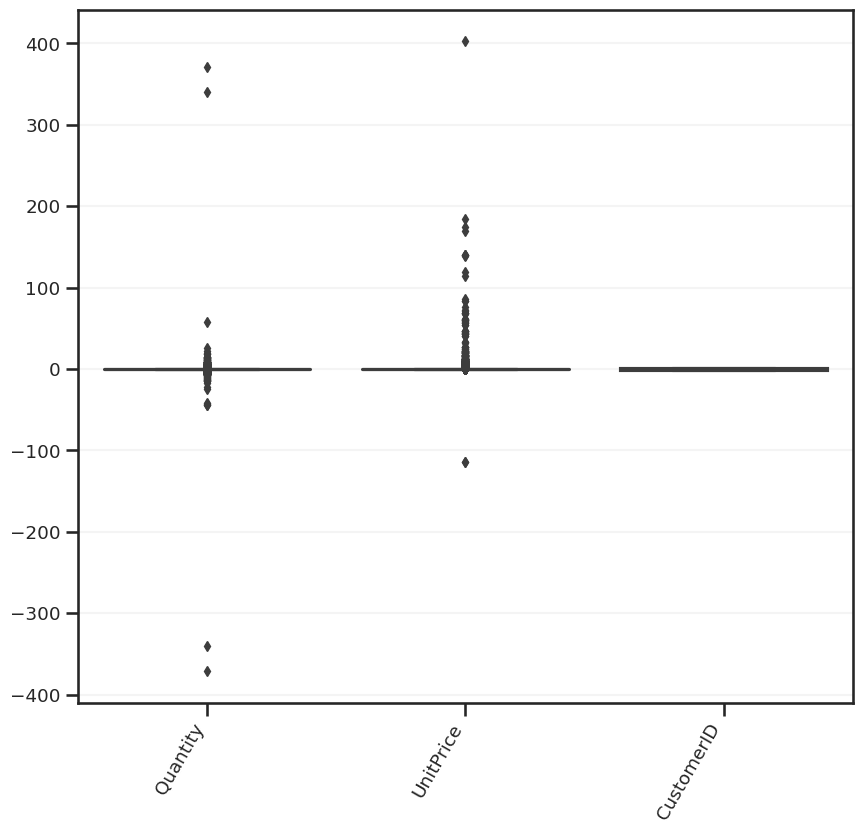

In [14]:
customer_profiles.gráfico_boxplot(
    dataframe=df,
    figsize=(10, 9)
)

### Data Preparetion:

In [15]:
df_copy = df.copy()

Removendo valores nulos:

In [16]:
df = customer_profiles.removendo_nulos(
    dataframe=df,
)

Convertendo a coluna 'CustomerID' para str:

In [17]:
colunas = ['CustomerID']

In [18]:
df[colunas] = customer_profiles.convertendo_colunas(
    dataframe=df,
    colunas=colunas,
    tipo='str'
)

Normalizando os dados:

In [19]:
colunas = ['Quantity', 'UnitPrice']

In [20]:
for coluna in colunas:
    df[coluna] = customer_profiles.normalizando_os_dados(
        dataframe=df[coluna]
    )

Identificando e removendo linhas com outliers (|Z-score| > 3):

In [21]:
colunas = ['Quantity', 'UnitPrice']

In [22]:
df = customer_profiles.removing_outliers_zscore(
    dataframe=df, 
    column=colunas, 
    threshold=3
)

Amount of outliers: 337


Identificando e removendo linhas com outliers (|Z-score| > 3):

In [23]:
df = customer_profiles.removing_outliers_zscore(
    dataframe=df, 
    column=colunas, 
    threshold=3
)

Amount of outliers: 8223


### Data Visualization:

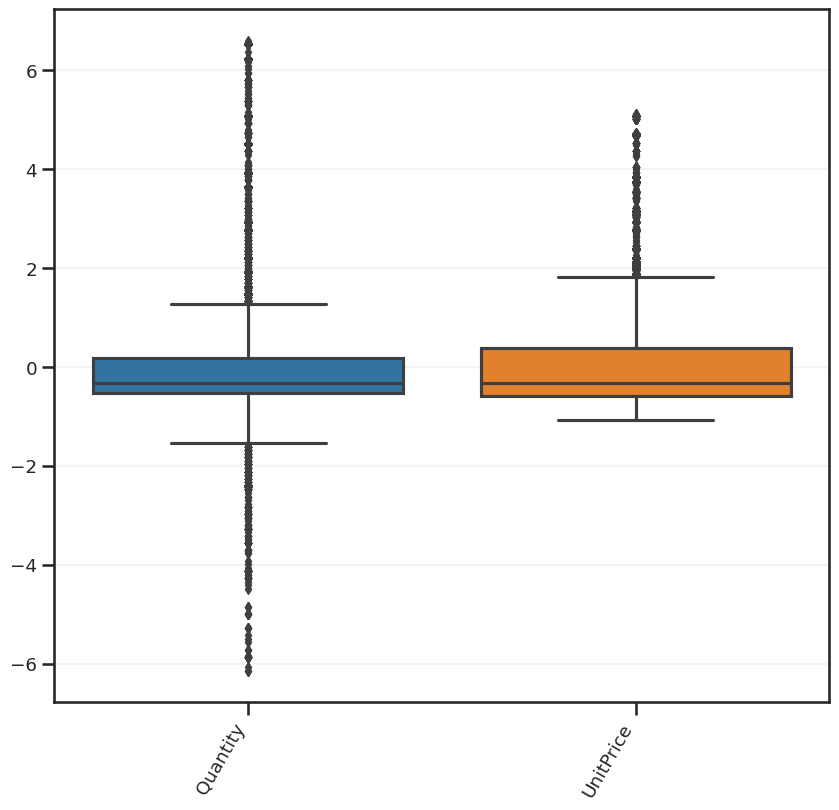

In [24]:
customer_profiles.gráfico_boxplot(
    dataframe=df,
    figsize=(10, 9)
)

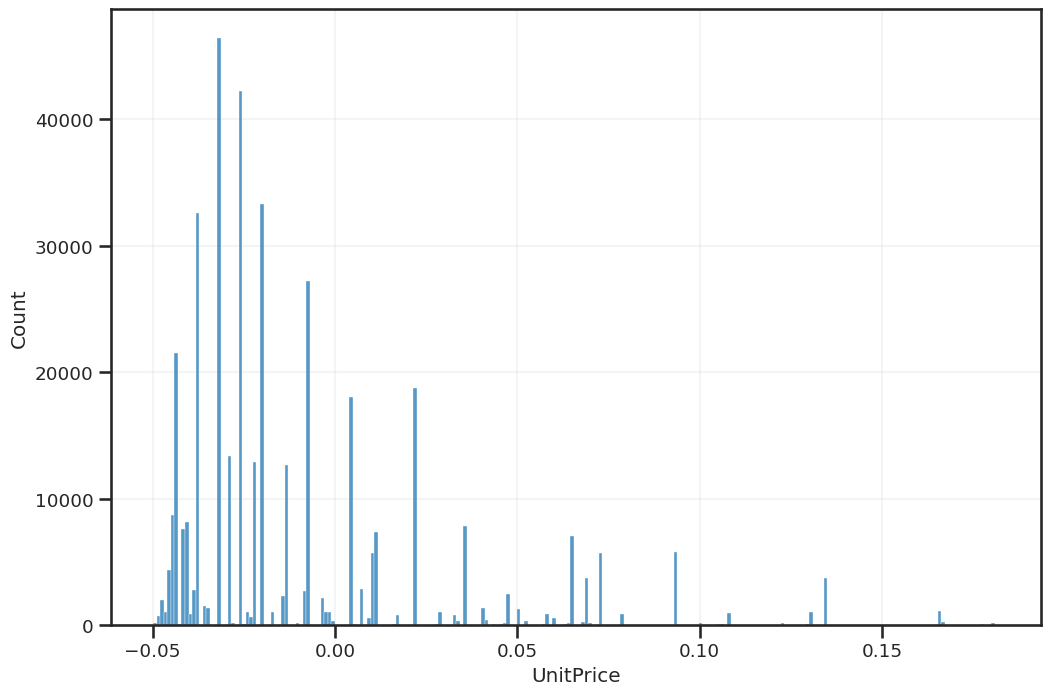

In [25]:
customer_profiles.gráfico_histplot(
    dataframe=df,
    coluna='UnitPrice'
)